# **Machine Learning with Python**

## Exercise 1.4: Supervised Learning Algorithms Part 1

### **Contents**

##### 1) Importing libraries and data sets
##### 2) Creating training and testing sets
##### 3) Running an artificial neural network model
##### 4) Testing out the number of layers, number of nodes per layer, max iterations, and tolerance. 
##### 5) Confusion matrix (Step 6)
##### 6) Final questions and paragraph (Step 7)

#### **1) Importing libraries and data sets**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
# Create a path to where the data is stored.

path = r'C:\Users\andd0\Documents\Machine Learning with Python'

In [3]:
climate = pd.read_csv(os.path.join(path, 'Main folder', '02 Data sets', 'Original data set', 'Dataset-weather-prediction-dataset-processed.csv'))

In [4]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
# Import the pleasant weather data

pleasantweather = pd.read_csv(os.path.join(path, 'Main folder', '02 Data sets', 'Original data set', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [6]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Reduce to just the temperature variables (Gdansk, Roma and Tours are not included in the 'Answers' dataset; therefore, they are excluded)

df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()


In [8]:
df.shape

(22950, 47)

#### **2) Creating training and testing sets**

In [9]:
# X and y datasets

X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [10]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Shapes

print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (17212, 45)
The shape of X_test is (5738, 45)
The shape of y_train is (17212, 15)
The shape of y_test is (5738, 15)


In [12]:
# Types

print(f'The type of X_train is {type(X_train)}')
print(f'The type of X_test is {type(X_test)}')
print(f'The type of y_train is {type(y_train)}')
print(f'The type of y_test is {type(y_test)}')

The type of X_train is <class 'pandas.core.frame.DataFrame'>
The type of X_test is <class 'pandas.core.frame.DataFrame'>
The type of y_train is <class 'pandas.core.frame.DataFrame'>
The type of y_test is <class 'pandas.core.frame.DataFrame'>


In [13]:
# Converting to np array

X_test = np.array(X_test) 
X_train = np.array(X_train)

#### **3) Running an artificial neural network model (Step 6)**

##### Running scaling:

In [14]:
# Scaling the data

scaler = StandardScaler()

# Fit the train data

scaler.fit(X_train)

# Scaling the X data

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


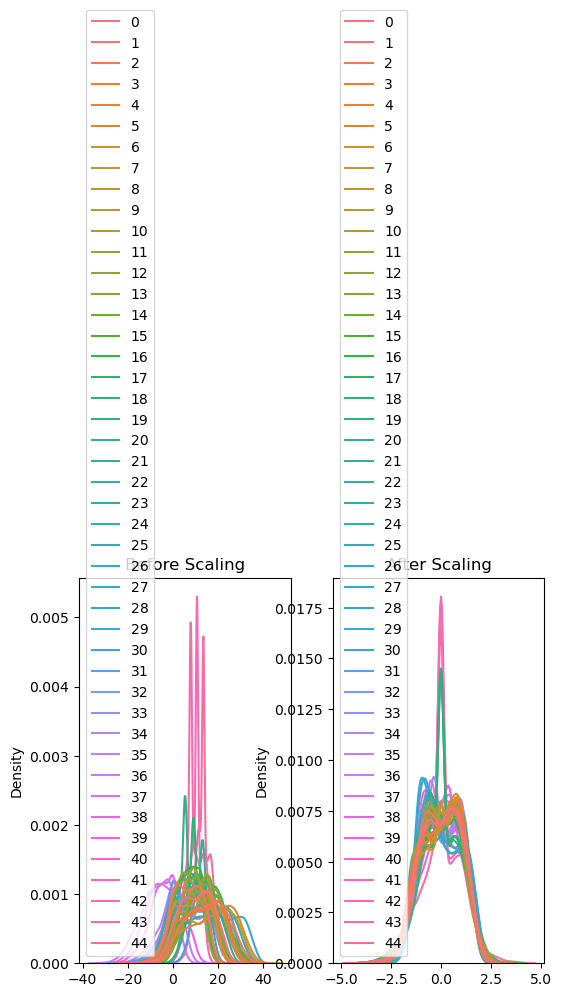

In [15]:
# Show scaling differences ## turn off legend

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)

plt.show()

##### **Will scaled data make a difference?**

<p style="line-height: 1.8;">
Before scaling: Different ranges and distributions. Some values spanned from -40 to +40, while others were much smaller.

After scaling: Features are closer to 0.

Conclusion: Scaling made a clear difference — since neural networks are sensitive to feature magnitude, normalization helps the model train more efficiently and reach better accuracy. </p>

#### **4) Testing out the number of layers, number of nodes per layer, max iterations, and tolerance.** 

In [16]:
# TEST A:

mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 8), max_iter=800, tol=0.00001)

# Fit the data to the model

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5, 8), max_iter=800, tol=1e-05)

In [17]:
# TEST B:

mlp = MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, tol=0.00000000001)

# Fit the data to the model

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, tol=1e-11)

In [18]:
# testing ANN accuracy # ANN MODEL B

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5085986521031838
0.4926803764377832


In [19]:
print(y_pred_test.shape)
print(y_test.shape)
print(y_pred.shape)
print(y_train.shape)

(5738, 15)
(5738, 15)
(17212, 15)
(17212, 15)


##### **What combination drives the best accuracy of the training and testing data?**

<p style="line-height: 1.8;">
After testing different network configurations, the combination (38, 18, 28) layers, max_iter = 2800, and tol = 1e-11 achieved the best overall performance, with a training accuracy of 0.5086 and testing accuracy of 0.4926.

The small gap between training and testing accuracy shows the model generalized reasonably well, though overall accuracy remained moderate.</p>

#### **5) Confusion matrix**

In [21]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

C:\Users\andd0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


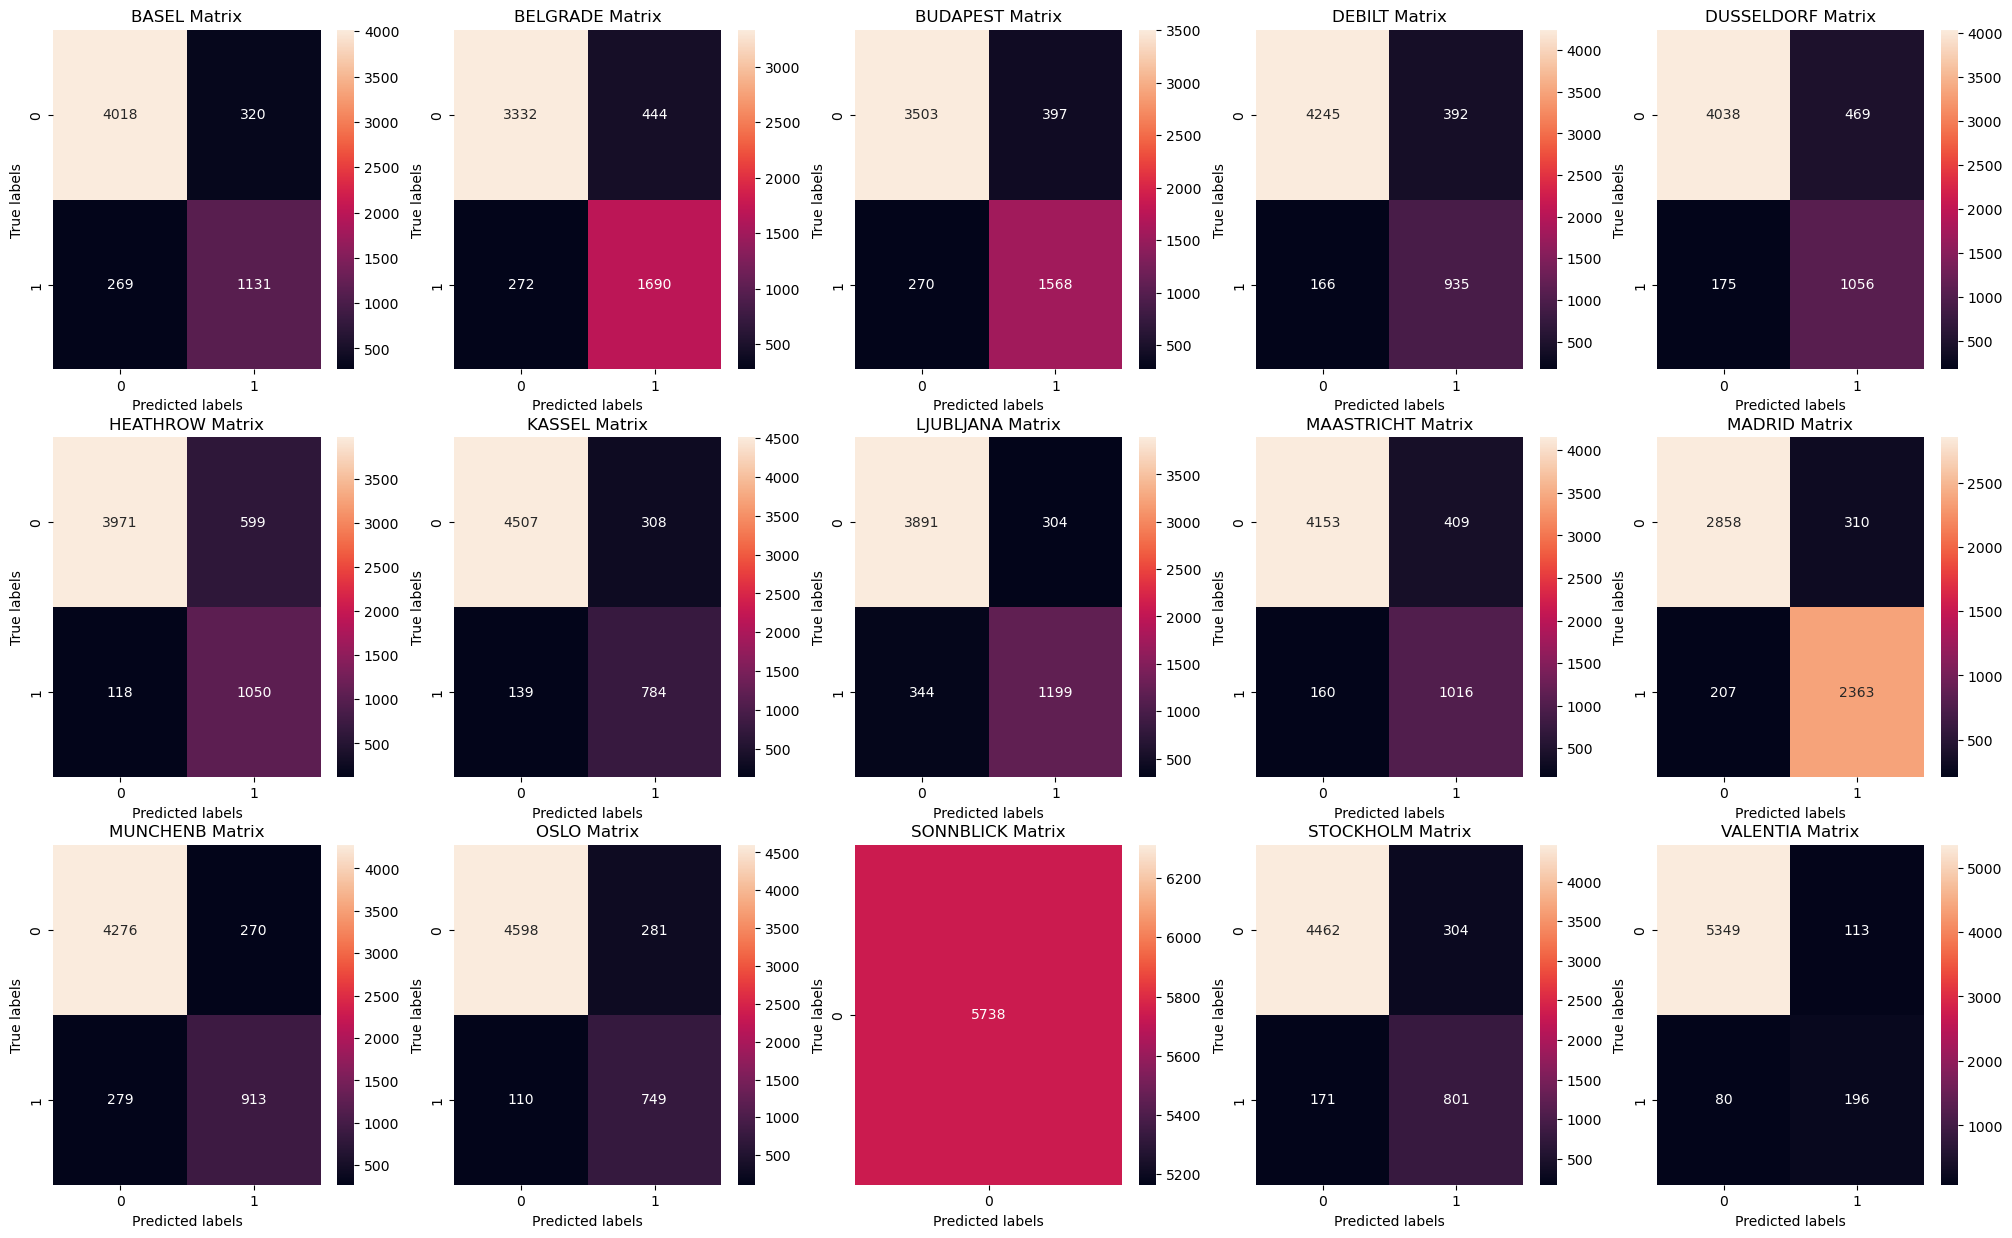

In [22]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### **6) Final questions and paragraph (Step 7)**

##### a) Which of these algorithms (including the KNN model from Exercise 1.4) do you think best predicts the current data?

##### b) Are any weather stations fully accurate? Is there any overfitting happening?

##### c) Are there certain features of the data set that might contribute to the overall accuracy?

##### d) Which model would you recommend that ClimateWins use?

<p style="line-height: 1.8;">
(a) ANN appears to best predict the current data. This is because it captures complex, non-linear relationships between features, which often occur in weather-related datasets.  (b) While some weather stations show very high accuracy, none are fully accurate, indicating that the model generalizes reasonably well without perfect fitting. However, a few cases of overfitting may appear when the model performs significantly better on training data than on testing data—especially when using too many layers or nodes. (c) Certain features, such as temperature, humidity, and pressure, likely contribute more to the model’s predictive accuracy, since they directly influence climate patterns. (d) I would recommend that ClimateWins use the Artificial Neural Network model, as it provides stronger performance and adaptability across multiple stations compared to simpler models like KNN.
</p>